### 1. Quantum coin

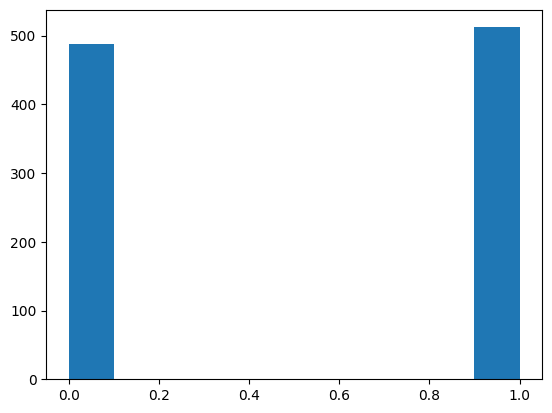

In [1]:
# import necessary packages:
import numpy as np
import matplotlib.pyplot as plt
import random
 
 
nflips = 1000
fliplist = [random.randint(0, 1) for f in range(nflips)]
 
 
# bar plots using get_gaussian_probs function
plt.hist(fliplist)
plt.show()

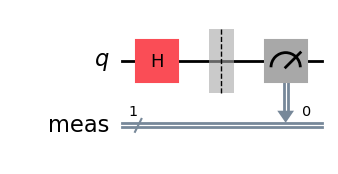

In [2]:
from qiskit import QuantumCircuit
 
qcoin = QuantumCircuit(1)
qcoin.h(0)
qcoin.measure_all()
 
qcoin.draw("mpl")

In [3]:
# Load the Qiskit Runtime service
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService()

In [4]:
# Load the Runtime primitive and session
from qiskit_ibm_runtime import (
    SamplerV2 as Sampler,
    EstimatorV2 as Estimator,
)
 
# Use the least busy backend
backend = service.least_busy()
print(backend.name)

ibm_fez


In [9]:
# Use a local simulator
 
from qiskit_aer import AerSimulator
 
# Generate a simulator that mimics the real quantum system
 
backend_sim = AerSimulator.from_backend(backend)
 
# Import an estimator, this time from qiskit (we will import from Runtime for real hardware)
 
from qiskit.primitives import BackendSamplerV2
sampler_sim = BackendSamplerV2(backend = backend_sim)
from qiskit.primitives import BackendEstimatorV2
estimator_sim = BackendEstimatorV2(backend = backend_sim)

In [6]:
## Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
 
qc_isa = pm.run(qcoin)

In [11]:
## Execute
 
# On real hardware:
# sampler = Sampler(mode=backend)
# pubs = [qc_isa]
# job = sampler.run(pubs, shots=1000)
# res = job.result()
 
# counts = res[0].data.meas.get_counts()
 
# or with Aer simulator with noise model from real backend
job = sampler_sim.run([qc_isa])
counts=job.result()[0].data.meas.get_counts()

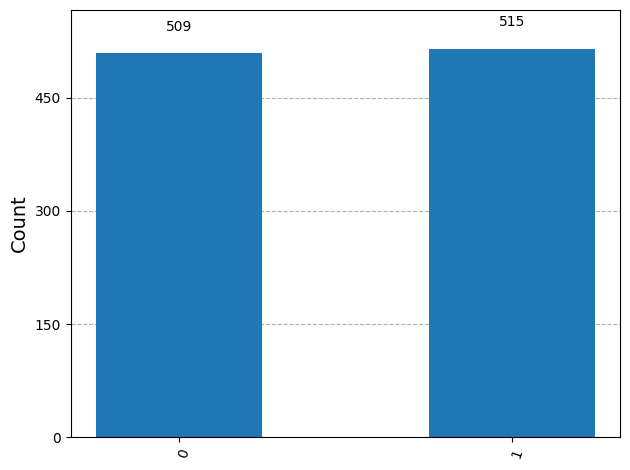

In [12]:
## Analysis
from qiskit.visualization import plot_histogram
 
plot_histogram(counts)

In [13]:
from qiskit.quantum_info import Pauli
 
qcoin = QuantumCircuit(1)
qcoin.h(0)
 
# for Estimator, we do not apply the measurement to the circuit

In [14]:
## Transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
 
obs = Pauli("Z")
 
qc_isa = pm.run(qcoin)
obs_isa = obs.apply_layout(layout=qc_isa.layout)

In [16]:
## Execute
 
# On real hardware:
estimator = Estimator(mode=backend_sim)
pubs = [(qc_isa, obs_isa)]
job = estimator.run([[qc_isa, obs_isa]])
res = job.result()
 
print(res[0].data.evs)

0.00439453125
